In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
neq = 10000

In [3]:
wkdir = os.getcwd()
datadir = wkdir + "/data/"

In [4]:
all_data_files = []
for datafile in os.listdir(datadir):
    if datafile.endswith('.csv'):
        all_data_files.append(datafile)

In [5]:
all_data_files

['ising_MC_T_1.200_J_1.000_L_10.csv',
 'ising_MC_T_2.600_J_1.000_L_10.csv',
 'ising_MC_T_3.600_J_1.000_L_10.csv',
 'ising_MC_T_3.400_J_1.000_L_10.csv',
 'ising_MC_T_1.400_J_1.000_L_10.csv',
 'ising_MC_T_1.600_J_1.000_L_10.csv',
 'ising_MC_T_2.200_J_1.000_L_10.csv',
 'ising_MC_T_0.800_J_1.000_L_10.csv',
 'ising_MC_T_0.200_J_1.000_L_10.csv',
 'ising_MC_T_2.800_J_1.000_L_10.csv',
 'ising_MC_T_0.600_J_1.000_L_10.csv',
 'ising_MC_T_2.400_J_1.000_L_10.csv',
 'ising_MC_T_2.000_J_1.000_L_10.csv',
 'ising_MC_T_3.200_J_1.000_L_10.csv',
 'ising_MC_T_0.400_J_1.000_L_10.csv',
 'ising_MC_T_1.800_J_1.000_L_10.csv',
 'ising_MC_T_3.000_J_1.000_L_10.csv',
 'ising_MC_T_1.000_J_1.000_L_10.csv',
 'ising_MC_T_3.800_J_1.000_L_10.csv',
 'ising_MC_T_4.000_J_1.000_L_10.csv']

In [6]:
df = pd.read_csv(datadir+all_data_files[0])
for i in range(1,len(all_data_files)):
    df2 = pd.read_csv(datadir+all_data_files[i])
    df = pd.concat([df, df2])
nulldata = df[df['T'].isna()]
print("There were "+str(len(nulldata))+" NaN entries in all data files")
#df.describe()
df = df.dropna()
df["T/J"] = df["T"]/(df["J"])
df["E/N"] = df["E"]/(df["L"]*df["L"])

There were 0 NaN entries in all data files


In [7]:
nulldata

,step,E,T,J,L


In [8]:
df.head()

,step,E,T,J,L,T/J,E/N
0,0,-97.0,1.2,1.0,10,1.2,-0.97
1,1,-128.0,1.2,1.0,10,1.2,-1.28
2,2,-161.0,1.2,1.0,10,1.2,-1.61
3,3,-161.0,1.2,1.0,10,1.2,-1.61
4,4,-88.0,1.2,1.0,10,1.2,-0.88


In [9]:
df.describe()

,step,E,T,J,L,T/J,E/N
count,4.000000e+06,4.000000e+06,4.000000e+06,4000000.0,4000000.0,4.000000e+06,4.000000e+06
mean,9.999950e+04,-1.123243e+02,2.100000e+00,1.0,10.0,2.100000e+00,-1.123243e+00
std,5.773503e+04,3.323357e+01,1.153256e+00,0.0,0.0,1.153256e+00,3.323357e-01
min,0.000000e+00,-3.300000e+02,2.000000e-01,1.0,10.0,2.000000e-01,-3.300000e+00
25%,4.999975e+04,-1.360000e+02,1.150000e+00,1.0,10.0,1.150000e+00,-1.360000e+00
50%,9.999950e+04,-1.120000e+02,2.100000e+00,1.0,10.0,2.100000e+00,-1.120000e+00
75%,1.499992e+05,-8.900000e+01,3.050000e+00,1.0,10.0,3.050000e+00,-8.900000e-01
max,1.999990e+05,3.900000e+01,4.000000e+00,1.0,10.0,4.000000e+00,3.900000e-01


In [10]:
means = df[df["step"]>neq].groupby(["T/J"]).mean()

In [11]:
means.head()

,step,E,T,J,L,E/N
T/J,,,,,,
0.2,105000.0,-112.278223,0.2,1.0,10.0,-1.122782
0.4,105000.0,-112.316591,0.4,1.0,10.0,-1.123166
0.6,105000.0,-112.385381,0.6,1.0,10.0,-1.123854
0.8,105000.0,-112.507403,0.8,1.0,10.0,-1.125074
1.0,105000.0,-112.296928,1.0,1.0,10.0,-1.122969


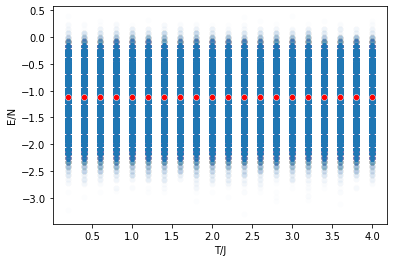

In [13]:
ax = sns.scatterplot(data = df, x = "T/J", y = "E/N", alpha = 0.01)
ax = sns.scatterplot(data = means, x = "T/J", y = "E/N", color = "red", alpha = 1)